In [ ]:
# 현재 colad이 실행되고 있는 곳을 알아보기

import os

print(os.getcwd())

import pandas as pd

/content


데이터를 메모리에 로딩하기 : pandas를 통해 데이터 보기와 데이터 관리하기

In [ ]:
# (1) load data into Pandas

# pandas 라이브러리를 사용하기 위한 import문
import pandas as pd 

# iris data file을 불러옴
df = pd.read_csv('/content/drive/MyDrive/DataSet/iris.csv')
# 메모리에 데이터를 로당. Pandas는 데이터 관리 및 작업 라이브러리가 됨

In [ ]:
# (2) sanity check with Pandas

print("shape of data in (rows, cloumns) is " + str(df.shape))
print(df.head()) # 데이터셋의 위에서 5줄 출력

# describe() ; 데이터셋의 요약 (표 형식)
# transpose() ; 표 전치
print(df.describe().transpose()) # 데이터셋의 통계학적인 요약 (표 형식)

# 데이터의 크기 (행과 열)를 점검하기 위해 .shape 속성을 사용
# 데이터프레임의 내용을 점검하기 위해 head()를 사용 -> 처음 다섯개 줄
# .describe()를 사용해 각 특징의 요약 통계량을 살펴봄

shape of data in (rows, cloumns) is (150, 5)
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
              count      mean       std  min  25%   50%  75%  max
sepal.length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal.width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal.length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal.width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


데이터 플롯과 탐구: seaborn의 능력 체험하기

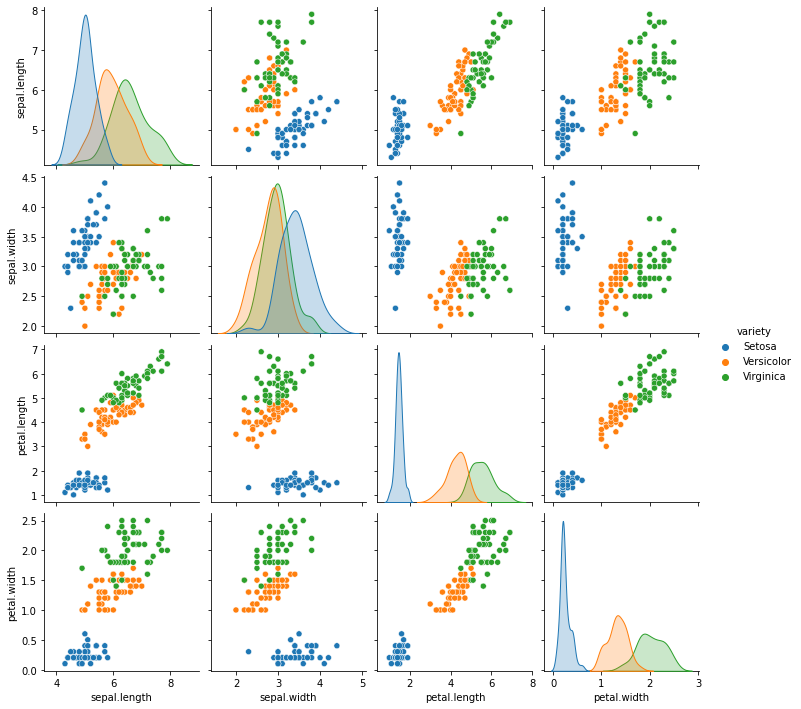

In [ ]:
# (3) explore with Seaborn pairplot
import seaborn as sns # seaborn을 이용해서 데이터를 시각화
sns.pairplot(df,hue='variety') # species = variety

# seaborn의 플롯 루틴인 페어 플롯을 통해 쌍의 형태를 갖는 특징 관계를 시각화
# 이 루틴을 통해 관계를 찾아내고, 후보들을 그룹화하고, 가능한 이상치를 찾아내고,
# 분석을 위해 어떤 전략을 사용할지에 관한 인사이트를 얻을 수 있음

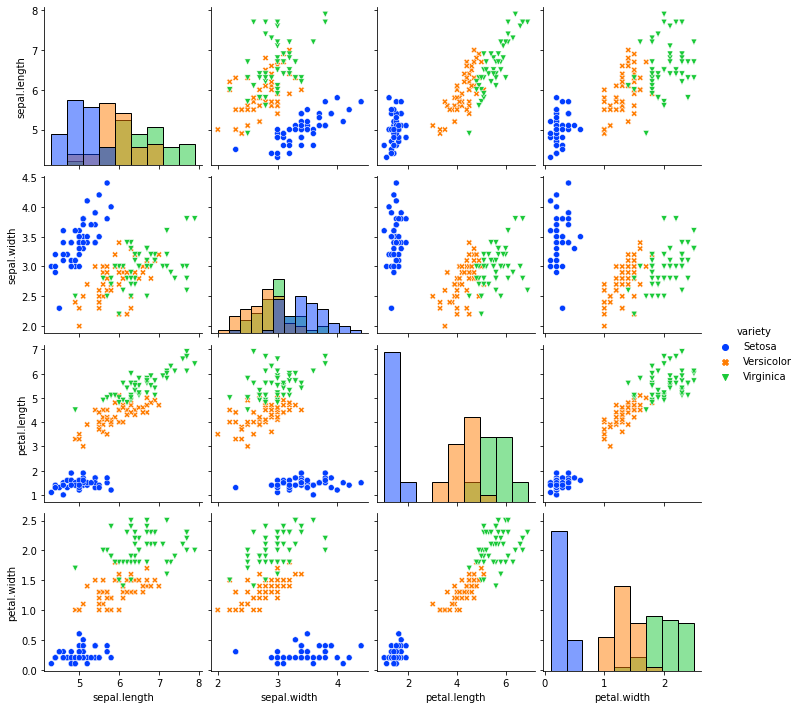

In [ ]:
# (4) add histograms to diagonals od Seaborn pairplot
sns.pairplot(df , hue='variety' , diag_kind='hist' , palette='bright' , markers=['o','X','v'])

# Seaborn version 0.11.0 사용할 수 있는 마크
# [',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

# 분포를 이해하는 데 히스토그램은 확률 밀도 플롯보다 쉽다
# seaborn을 통해, 더 쉽게는 diag_kind를 통해 다이터그램을 지절
# palette와 marker 옵션을 통해 차트의 외양을 바꿀 수 있음

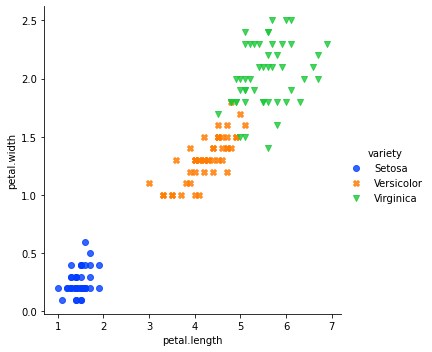

In [ ]:
# (5) plot bivariate scatter with Seaborn 
# seaborn을 이용해서 데이터 시각화
sns.lmplot(x='petal.length', y='petal.width', hue='variety', data=df, fit_reg=False, palette='bright', markers=['o','X','v'])

# 두 개의 변수를 선탣하고 seaborn의 Implot을 사용해 스캐터 플롯으로 표현
# 중요한 관계들을 따로 분리해서 보여주기 위해 이변량 스캐터 플롯을 사용

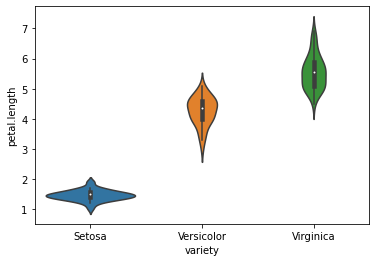

In [ ]:
# (6)
sns.violinplot(x='variety', y='petal.length', data=df)
# 단일 특징 벡터의 시각화에는 바이올린 플롯을 많이 사용
# 값의 분포와 클래스의 분산을 한 플롯에 표현

데이터 변환 : scikit-learn을 활용한 PCA와 LDA

In [ ]:
# (7) reduce dimensions with PCA
# PCA로 차원 줄이기

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
out_pca = pca.fit_transform(df[['sepal.length',
                                'sepal.width',
                                'petal.length',
                                'petal.width']])
# 인간이 이해 할 수 있는 1~3차원으로 데이터를 시각화 해야함
# PCA를 이용하여 2차원으로 데이터를 시각화 해준다

# 네 개의 특징을 갖는 iris 데이터를 사용해 두 개의 차원을 갖도록 변환

In [ ]:
# (8) 
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1','pca2'])
print(df_pca.head())

# 결과 데이터를 pandas 데이터 프레임으로 생성하고, 점검하기 위해 .head() 사용
# head()는 데이터 5행을 출력해줌을 기억하자.

       pca1      pca2
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949
3 -2.745343 -0.318299
4 -2.728717  0.326755


       pca1      pca2 variety
0 -2.684126  0.319397  Setosa
1 -2.714142 -0.177001  Setosa
2 -2.888991 -0.144949  Setosa
3 -2.745343 -0.318299  Setosa
4 -2.728717  0.326755  Setosa


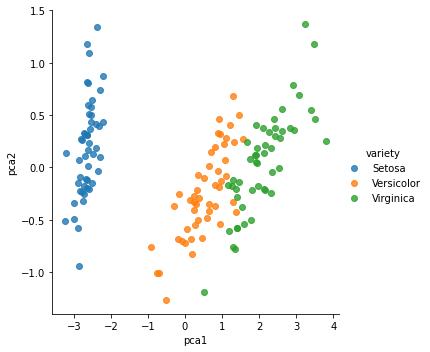

In [ ]:
# (9)
# 동일한 형태의 데이터 프레임 합치기 (가로 방향)
# 계속 실행하면 'variety' attribute가 오른쪽에 계속 추가됨
df_pca = pd.concat([df_pca, df[['variety']]], axis = 1) # 왼쪽 + 오른쪽으로 데이터 합치기 axis = 1
print(df_pca.head())
sns.lmplot(x="pca1", y="pca2", hue="variety", data=df_pca, fit_reg=False)

# 타겟 혹은 레이블 열을 만듦
# 변환된 데이터가 2차원으로 플롯된 것을 확인

       lda1      lda2 variety
0  8.061800  0.300421  Setosa
1  7.128688 -0.786660  Setosa
2  7.489828 -0.265384  Setosa
3  6.813201 -0.670631  Setosa
4  8.132309  0.514463  Setosa


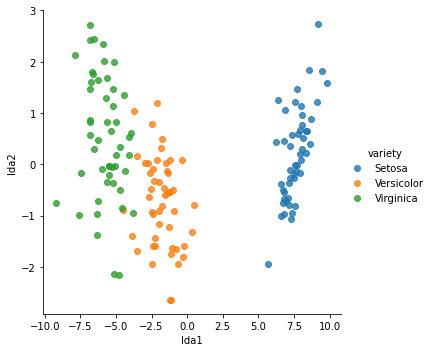

In [ ]:
# (10) reduce dimensions with LDA
# LDA(Linear Discriminant Analysis) ; 선형 판별 분석
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2) # 2차원으로 변환

# format dataframe
out_lda  = lda.fit_transform(X=df.iloc[:,:4], y=df['variety'])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['variety']]], axis = 1) # 데이터 프레임 가로 방향으로 합치기

# sanity check
print(df_lda.head())

# plot
sns.lmplot(x="lda1", y="lda2", hue='variety', data=df_lda, fit_reg=False)
# 가장 인기 있는 레이블을 포함한 차원 감소 기법은 선형 판별 분석 (LDA)

Text(0.5, 1.0, 'Violin plot: Feature = PCA_1')

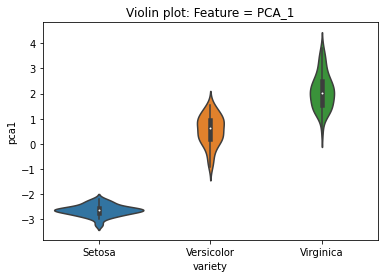

In [ ]:
# (11)
sns.violinplot(x='variety', y='pca1', data=df_pca).set_title("Violin plot: Feature = PCA_1")
# 바이올린 플룻을 사용해서 PCA가 데이터에 대해 변환을 확인 (첫 번째 요소)

Text(0.5, 1.0, 'Violin plot: Feature = LDA_1')

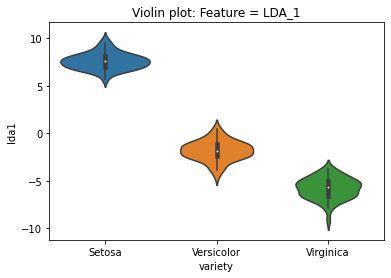

In [ ]:
# (12)
sns.violinplot(x='variety', y='lda1', data=df_lda).set_title("Violin plot: Feature = LDA_1")
# 바이올린 플룻을 사용해서 LDA가 데이터에 대해 변환을 확인 (첫 번째 요소)

분리를 계량화하기 : K-평균 클러스터링과 실루엣 점수

In [ ]:
# (13) cluster With k-means and check silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initialize k-means algo object
kmns = KMeans(n_clusters=3, random_state=42)

# fit algo to pca and find silhouette score
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))

# fit algo to lda and find silhouette score
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f" % silhouette)

# 이 데이터를 그룹화하기 위해서 K-평균 클러스터링 알고리즘을 사용하고,
# 다음으로 클러스터의 압축성을 점수화하기 위해 실루엣 계수라 불리는 계량적 지표를 사용

PCA silhouette score = 0.597676421954799
LDA silhouette score = 0.655816


의사 결정 혹은 예측

In [ ]:
# (14) Split into train/validation/test set

from sklearn.model_selection import train_test_split
# 데이터를 train data와 test data로 나눔
df_train, df_test = train_test_split(df_lda, test_size=0.3, random_state=42)
# 테스트 데이터 셋의 비율을 전체 데이터 셋의 30%

# Sanity check
print('train set shape = ' + str(df_train.shape))
print('test set shape = ' + str(df_test.shape))
print(df_train.head())

# 예측을 하기 전에 데이터를 훈련 데이터와 테스트 데이터로 나눈다.
# 훈련 데이터레 기반해 예측 모델을 수립하고, F1 점수를 사용해 테스트 데이터를 점수화 해본다.

train set shape = (105, 3)
test set shape = (45, 3)
         lda1      lda2     variety
81  -0.605525 -1.942980  Versicolor
133 -3.815160 -0.942986   Virginica
137 -4.995503  0.187769   Virginica
75  -1.437558 -0.134425  Versicolor
109 -6.852813  2.717590   Virginica


In [ ]:
# (15) classify with SVM
# SVM을 이용하여서 모델의 성능을 평가

from sklearn.svm import SVC
from sklearn.metrics import f1_score
clf = SVC(kernel='rbf', C=0.8, gamma=10)
clf.fit(df_train[['lda1', 'lda2']], df_train['variety'])

# predict on test set
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['variety'], y_pred, average='weighted')

# check prediction score
# f1_score가 얼마나 잘 나오는지 파악
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.809216 


In [ ]:
# (16) classify with SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score
clf = SVC(kernel='rbf', C=1, gamma=10)
clf.fit(df_train[['lda1', 'lda2']], df_train['variety'])
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['variety'], y_pred, average='weighted')
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.851366 


In [ ]:
# (17) classify with RF
# RandomForest를 이용하여서 모델에서 분류
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(df_train[['lda1', 'lda2']], df_train['variety'])
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['variety'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.955291 
